In [4]:
#import needed libraries and data sheet. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import rc
import seaborn as sns
import matplotlib
from textwrap import wrap

#Read our preprocessed data into a pandas df
MyRegion = pd.read_csv('Data/Cleaned_Filtered_Data.csv')

6995     199
5995     167
4995     137
7995     129
3500     129
8995     120
4500     115
12995    114
6500     112
3995     104
Name: price, dtype: int64
3475     1
5575     1
7577     1
11695    1
24400    1
Name: price, dtype: int64


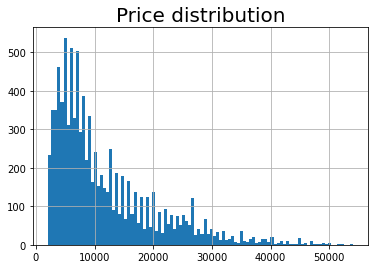

In [2]:
#An overal distribution of price in our dataset
print(MyRegion['price'].value_counts().sort_values(ascending=False).head(10))
print(MyRegion['price'].value_counts().tail())


MyRegion['price'].hist(bins=100)
plt.title('Price distribution', fontsize=20)
plt.show()


In [6]:
#We know that age is one of the most impactful factors on vehicle price.
#What does this look like, when are the vehicles worth the most?

#Use pandas to group our df by age and price. get average and median values.
AgeGrp=MyRegion.groupby('age')['price'].mean().round().to_frame()
AgeGrp=AgeGrp.reset_index()
AgeGrp['age']=AgeGrp['age'].astype(str)
AgeGrp['age']=AgeGrp['age']+' Years'


AgeGrp2=MyRegion.groupby('age')['price'].median().round().to_frame()
AgeGrp2=AgeGrp2.reset_index()
AgeGrp2['age']=AgeGrp2['age'].astype(str)
AgeGrp2['age']=AgeGrp2['age']+' Years'

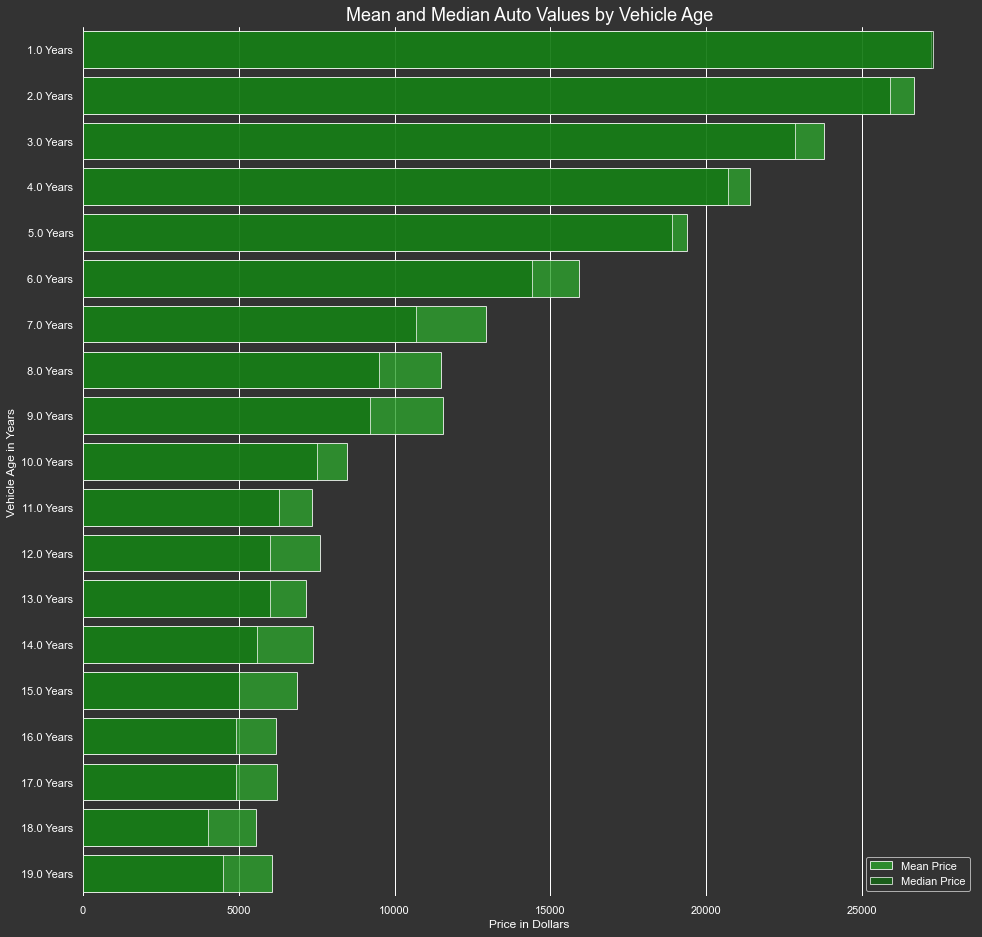

In [19]:
#Some styling assistance from http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/examples/horizontal_barplot.html
f, ax = plt.subplots(figsize=(16, 16))

sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
sns.set_color_codes("pastel")
sns.barplot(x="price", y="age", data=AgeGrp,label="Mean Price", color="#19b519",alpha=.8)

sns.set_color_codes("muted")
sns.barplot(x="price", y="age", data=AgeGrp2,
            label="Median Price", color="#008000",alpha=.7)

ax.legend(ncol=2, loc="lower right",frameon=True)
ax.set_title("Mean and Median Auto Values by Vehicle Age", fontsize=18, color='white')

legend = ax.legend()
plt.setp(legend.get_texts(), color='w')
#ax.grid(False)
ax.set_xlabel("Price in Dollars", color="white")
ax.set_ylabel("Vehicle Age in Years", color="white")

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.despine(left=True, bottom=True)
f.savefig('PricebyAge.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [58]:
#Caluclate the volume of total vehicles sold at each age
AgeGrp3=MyRegion.groupby('age').size().to_frame()
AgeGrp3=AgeGrp3.reset_index()
AgeGrp3['age']=AgeGrp3['age'].astype(str)
AgeGrp3['age']=AgeGrp3['age']+' Years'

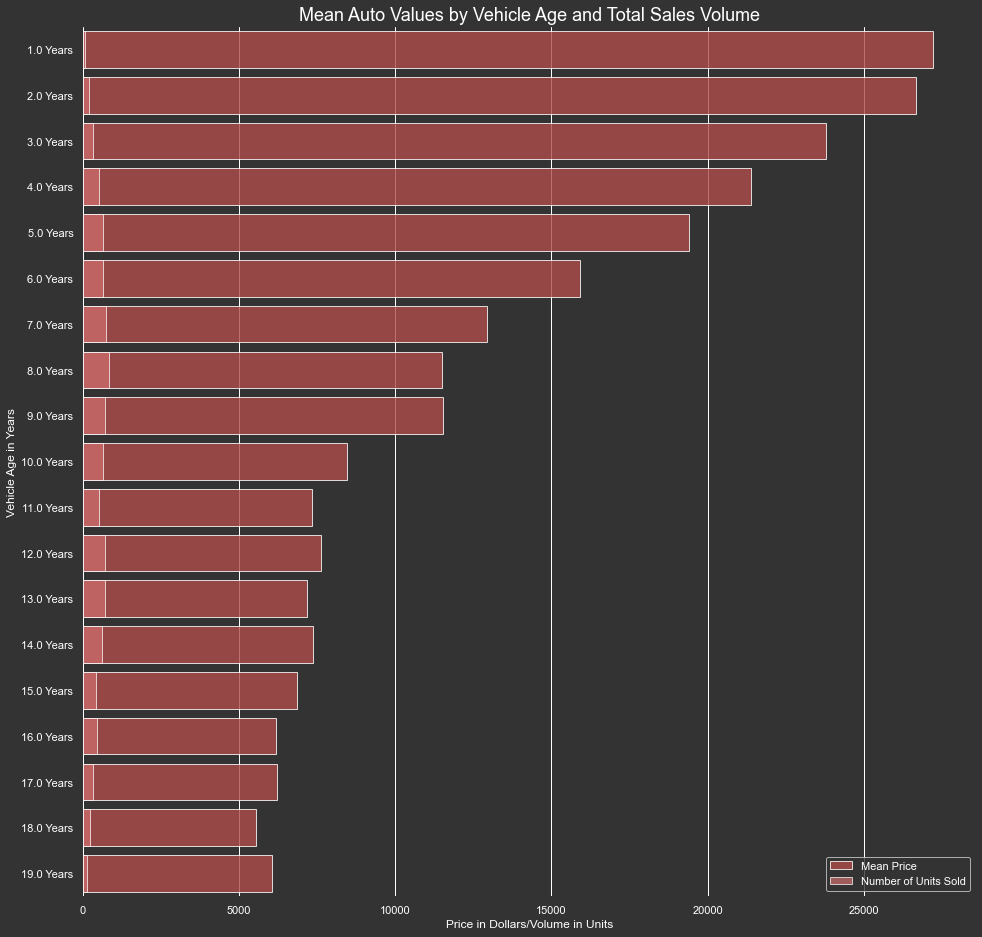

In [61]:
#Some styling assistance from http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/examples/horizontal_barplot.html
f, ax = plt.subplots(figsize=(16, 16))

sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
sns.set_color_codes("pastel")
sns.barplot(x="price", y="age", data=AgeGrp,label="Mean Price", color="#bd3d3a",alpha=.8)

sns.set_color_codes("muted")
sns.barplot(x=0, y="age", data=AgeGrp3,
            label="Number of Units Sold", color="#e0605e",alpha=.7)

ax.legend(ncol=2, loc="lower right",frameon=True)
ax.set_title("Mean Auto Values by Vehicle Age and Total Sales Volume", fontsize=18, color='white')

legend = ax.legend()
plt.setp(legend.get_texts(), color='w')
#ax.grid(False)
ax.set_xlabel("Price in Dollars/Volume in Units", color="white")
ax.set_ylabel("Vehicle Age in Years", color="white")

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.despine(left=True, bottom=True)
f.savefig('PricebyAgeVolume.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [41]:
#Nest we will see how milage effects price. To make this more easily digestable we will bin our milage into several classes
# in intervals of 10,000.
#https://stackoverflow.com/questions/54900253/how-to-create-bins-of-continuous-variable-in-pandas-dynamically

limit1=((MyRegion.odometer//10000)*10000).min()
limit2=((MyRegion.odometer//10000+1)*10000).max()

bins = np.arange(limit1,limit2+10000,10000)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

MyRegion['bin'] = pd.cut(MyRegion.odometer, bins=bins, labels=labels, right=False)
MyRegion

,Unnamed: 0,level_0,index,price,year,manufacturer,model,condition,cylinders,odometer,...,type,state,age,Condition,Cylinders,Manufacturer,Transmission,Model,Type,bin
0,0,0,3468,7999,2012.0,subaru,legacy,excellent,4 cylinders,122120.0,...,sedan,va,8.0,3,4,0,0,0,0,120000-130000
1,1,1,3652,2800,2004.0,toyota,camry le,good,4 cylinders,191000.0,...,sedan,va,16.0,2,4,1,0,1,0,190000-200000
2,2,2,3654,9450,2012.0,volvo,s80,like new,6 cylinders,92000.0,...,sedan,va,8.0,4,6,2,0,2,0,90000-100000
3,3,3,3677,2100,2002.0,volkswagen,new beetle gls,excellent,4 cylinders,141840.0,...,hatchback,va,18.0,3,4,3,0,3,1,140000-150000
4,4,4,3678,2900,2010.0,hyundai,elantra gls wagon,good,4 cylinders,186650.0,...,wagon,va,10.0,2,4,4,0,4,2,180000-190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,9479,9479,450852,9900,2014.0,nissan,murano sl,excellent,6 cylinders,130569.0,...,SUV,pa,6.0,3,6,5,0,1458,6,130000-140000
9480,9480,9480,450853,2300,2004.0,chevrolet,malibu maxx,good,6 cylinders,158000.0,...,wagon,pa,16.0,2,6,9,0,2097,2,150000-160000
9481,9481,9481,450859,3200,2007.0,ford,focus,good,4 cylinders,117000.0,...,hatchback,pa,13.0,2,4,13,2,255,1,110000-120000
9482,9482,9482,450860,2300,2006.0,volkswagen,passat,fair,4 cylinders,122141.0,...,sedan,pa,14.0,1,4,3,0,147,0,120000-130000


In [42]:
#Same concept as above. Once the data is classsified by mileage range, we group by price and mileage bin then get our 
#average prices by odometer

MileGrp=MyRegion.groupby('bin')['price'].mean().round().to_frame()
MileGrp=MileGrp.reset_index()

MileGrp2=MyRegion.groupby('bin')['price'].median().round().to_frame()
MileGrp2=MileGrp2.reset_index()
MileGrp

,bin,price
0,0-10000,19075.0
1,10000-20000,26500.0
2,20000-30000,22959.0
3,30000-40000,21907.0
4,40000-50000,19065.0
5,50000-60000,18781.0
6,60000-70000,14971.0
7,70000-80000,12878.0
8,80000-90000,11857.0
9,90000-100000,10195.0


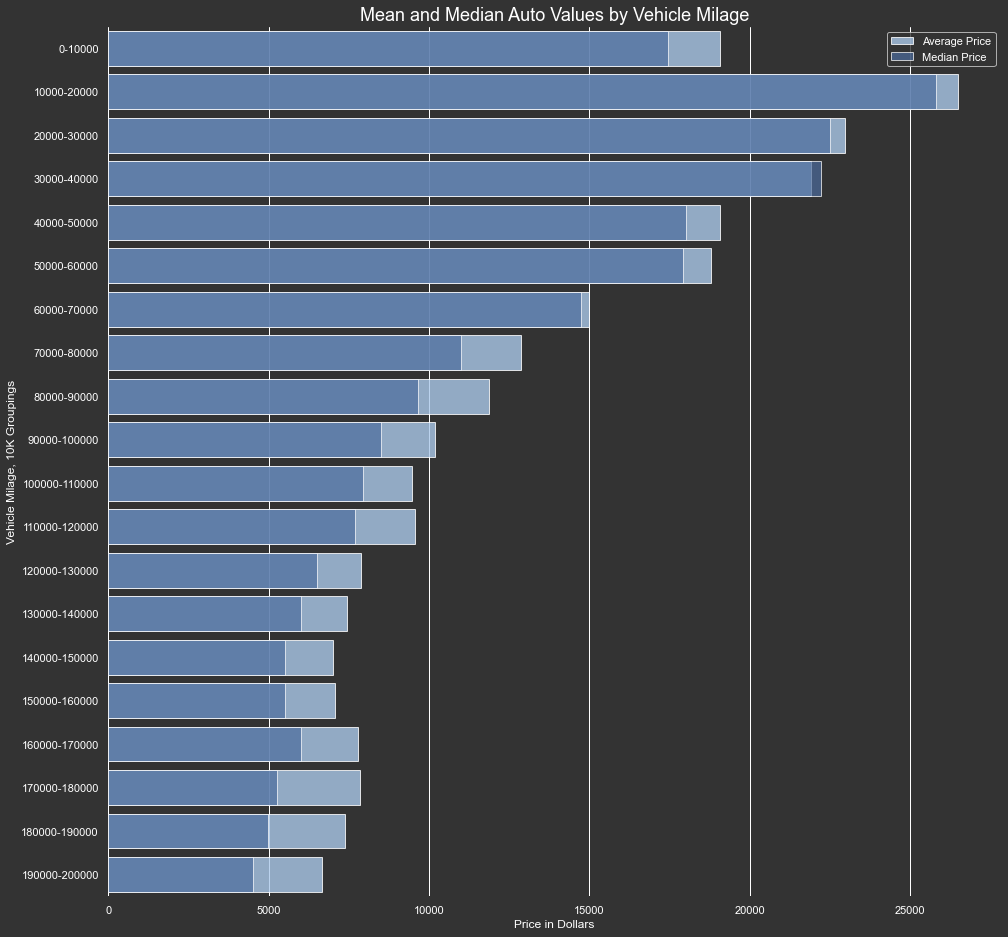

In [44]:
f, ax = plt.subplots(figsize=(16, 16))

sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
sns.set_color_codes("pastel")
sns.barplot(x="price", y="bin", data=MileGrp,label="Average Price", color="b",alpha=.8)

sns.set_color_codes("muted")
sns.barplot(x="price", y="bin", data=MileGrp2,
            label="Median Price", color="#3f69aa",alpha=.7)

ax.legend(ncol=2, loc="lower right",frameon=True)
legend = ax.legend()
plt.setp(legend.get_texts(), color='w')
ax.set_title("Mean and Median Auto Values by Vehicle Milage", fontsize=18, color='white')

ax.set_xlabel("Price in Dollars", color="white")
ax.set_ylabel("Vehicle Milage, 10K Groupings", color="white")

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.despine(left=True, bottom=True)
f.savefig('PricebyMiles.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [50]:
#Caluclate the volume of total vehicles sold at each milage range

MileGrp3=MyRegion.groupby('bin').size().to_frame()
MileGrp3=MileGrp3.reset_index()

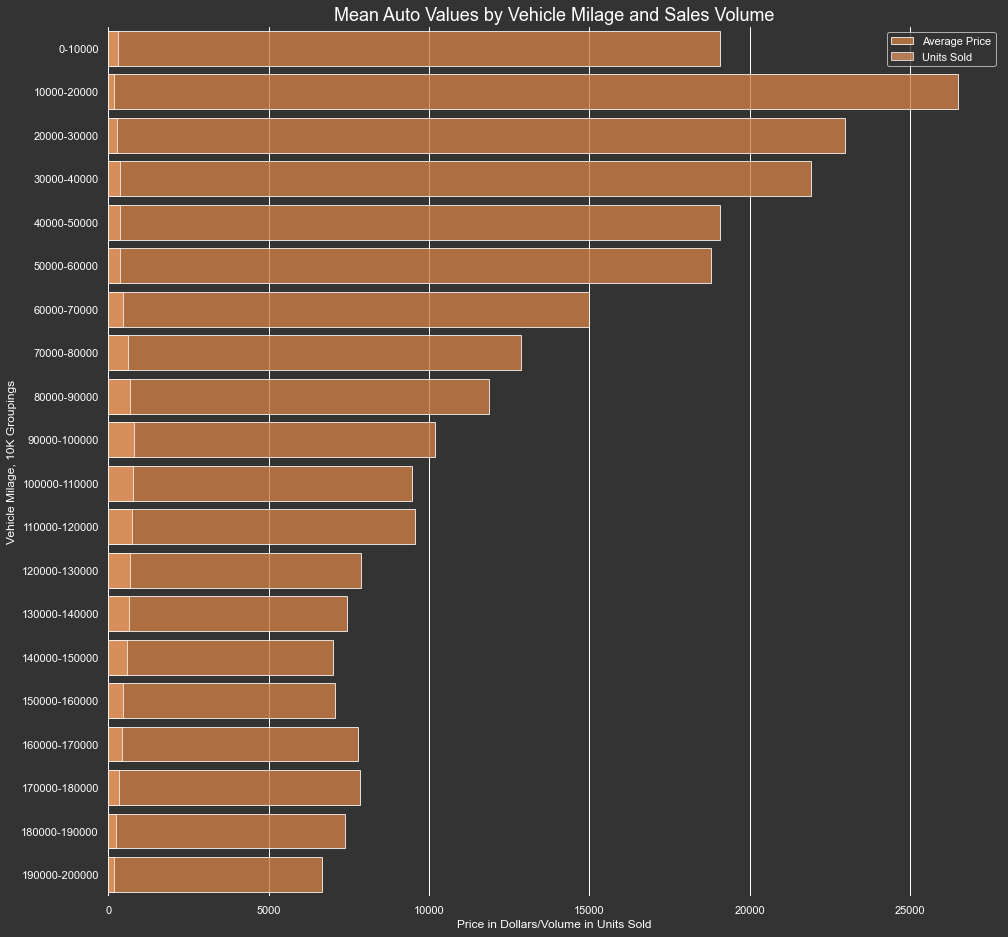

In [62]:
f, ax = plt.subplots(figsize=(16, 16))

sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
sns.set_color_codes("pastel")
sns.barplot(x="price", y="bin", data=MileGrp,label="Average Price", color="#e47a2e",alpha=.8)

sns.set_color_codes("muted")
sns.barplot(x=0, y="bin", data=MileGrp3,
            label="Units Sold", color="#ff994f",alpha=.7)

ax.legend(ncol=2, loc="lower right",frameon=True)
legend = ax.legend()
plt.setp(legend.get_texts(), color='w')
ax.set_title("Mean Auto Values by Vehicle Milage and Sales Volume", fontsize=18, color='white')

ax.set_xlabel("Price in Dollars/Volume in Units Sold", color="white")
ax.set_ylabel("Vehicle Milage, 10K Groupings", color="white")

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
sns.despine(left=True, bottom=True)
f.savefig('PricebyMilesVolume.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [63]:
#Price average by vehicle type grouping
TypeGrp=MyRegion.groupby('type')['price'].mean().sort_values(ascending=False).round().to_frame()
TypeGrp=TypeGrp.reset_index()

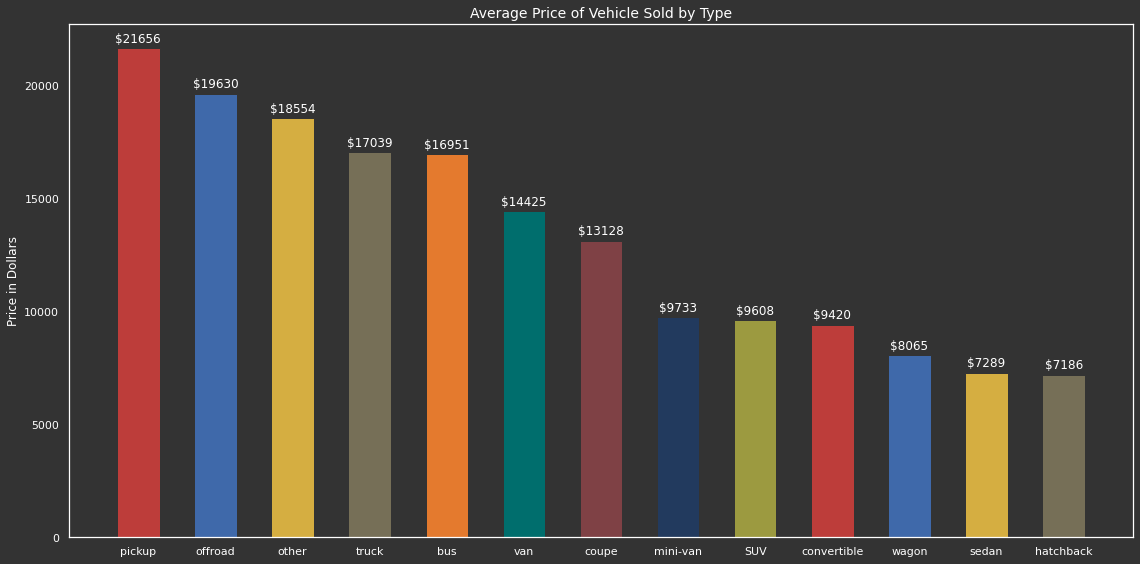

In [74]:
#Some styling assistance from matplotlib example docs
#https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'montserrat'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor']= 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.rcParams['patch.edgecolor'] = '#333333'

labels = TypeGrp['type']
labels = [ '\n'.join(wrap(l, 15)) for l in labels ]

Vehicle_means = TypeGrp['price'].astype(int)

x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x, Vehicle_means, width, label='',color=['#BD3D3A', '#3F69AA', '#D5AE41', '#766F57','#E47A2E',"#006E6D",'#7F4145','#223A5E',"#9C9A40"])

ax.set_ylabel('Price in Dollars')
ax.set_title('Average Price of Vehicle Sold by Type',size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('${}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(False)

autolabel(rects1)

fig.tight_layout()

plt.show()
fig.savefig('TypeChart.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

In [76]:
#Price average by vehicle engine grouping

CylGrp=MyRegion.groupby('cylinders')['price'].mean().sort_values(ascending=False).round().to_frame()
CylGrp=CylGrp.reset_index()

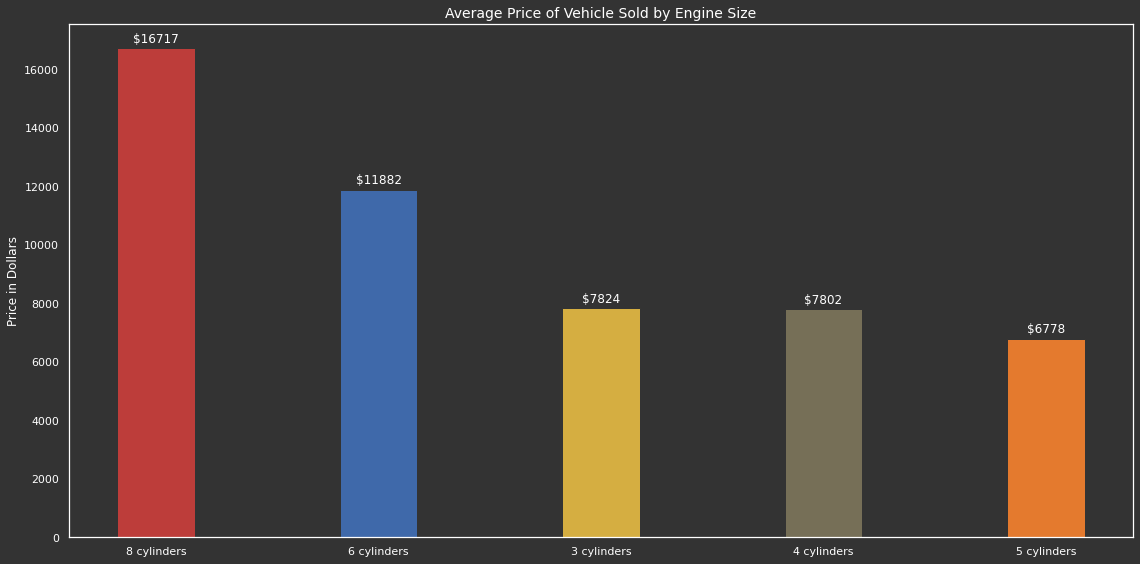

In [78]:
sns.set(rc={'axes.facecolor':'#333333', 'figure.facecolor':'#333333'})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'montserrat'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor']= 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.rcParams['patch.edgecolor'] = '#333333'

labels = CylGrp['cylinders']
labels = [ '\n'.join(wrap(l, 15)) for l in labels ]

men_means = CylGrp['price'].astype(int)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x, men_means, width, label='',color=['#BD3D3A', '#3F69AA', '#D5AE41', '#766F57','#E47A2E',"#006E6D",'#7F4145','#223A5E',"#9C9A40"])

ax.set_ylabel('Price in Dollars')
ax.set_title('Average Price of Vehicle Sold by Engine Size',size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('${}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(False)

autolabel(rects1)

fig.tight_layout()

plt.show()
fig.savefig('EngineChart.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))

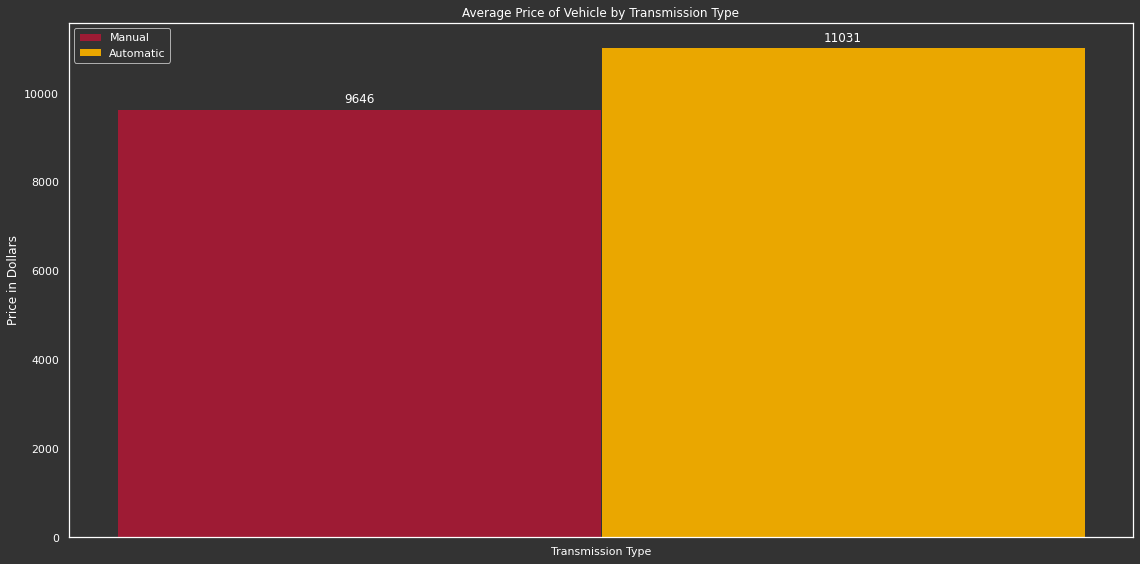

In [81]:
labels = ['Transmission Type']
men_means = (round(MyRegion[(MyRegion['transmission'] == 'manual')]['price'].mean()))
women_means = (round(MyRegion[(MyRegion['transmission'] == 'automatic')]['price'].mean()))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x - width/2, men_means, width, label='Manual',color='#9E1B34')
rects2 = ax.bar(x + width/2, women_means, width, label='Automatic',color='#EAA700')

ax.set_ylabel('Price in Dollars')
ax.set_title('Average Price of Vehicle by Transmission Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.grid(False)

plt.show()
fig.savefig('TransPrice.png',transparent=False,dpi=100,bbox_inches='tight', facecolor=('#333333'))